In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,precision_score, auc, f1_score, cohen_kappa_score, recall_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score
import numpy as np
from inspect import signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn import metrics
import pydotplus
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 1. Prepare Data

In [2]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [3]:
y_train_resampled = pd.read_csv("../3. Data Preparation/y_train_resampled.csv", index_col=0)
y_train_resampled.shape

(1848, 1)

In [4]:
X_val = pd.read_csv("../3. Data Preparation/X_val.csv", index_col=0)
X_val.shape

(56962, 30)

In [5]:
y_val = pd.read_csv("../3. Data Preparation/y_val.csv", index_col=0, header=0)
y_val.shape

(56962, 1)

# Define function Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)


# Define function precision_recall

In [7]:
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

# Define function ROC Curve

In [8]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

# 2.1 Random Forest with OOB_12


In [9]:
randomForestOOB12 = joblib.load('../5. Modeling - Random Forest/RandomForest (OOB_12 Features - Optimal Parameters).pkl')

In [10]:
OOB_12 = pd.read_csv("../5. Modeling - Random Forest/Random Forest (AllFeatures - OOB - 12).csv", index_col=0)
OOB_12.shape

(12, 1)

In [11]:
y_pred_random12 = randomForestOOB12.predict(X_val[OOB_12.index.values])
y_score_random12 = randomForestOOB12.predict_proba(X_val[OOB_12.index.values])[:,1]

Confusion matrix, without normalization
[[56604   261]
 [   11    86]]


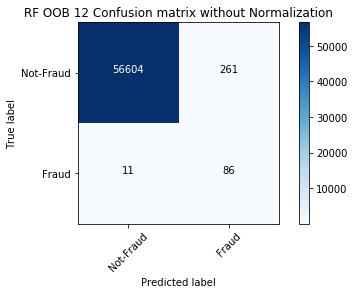

Normalized confusion matrix
[[1.   0.  ]
 [0.11 0.89]]


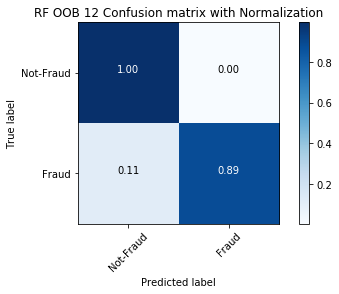

In [14]:
cm = confusion_matrix(y_val['Class'].values, y_pred_random12)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'RF OOB 12 Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'RF OOB 12 Confusion matrix with Normalization')
plt.show()

In [15]:
prec = precision_score(y_val['Class'], y_pred_random12)
rec = recall_score(y_val['Class'], y_pred_random12)

print('Precision:', prec)
print('Recall:', rec)

Precision: 0.2478386167146974
Recall: 0.8865979381443299


# ROC on value score

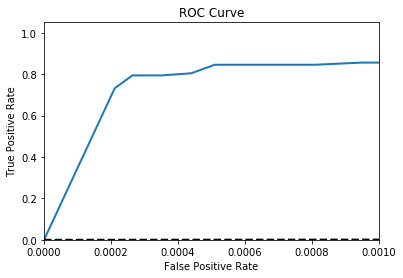

In [16]:
fpr, tpr, t =roc_curve(y_val, y_score_random12)
plot_roc()

In [17]:
fpr_randomOOB12, tpr_randomOOB12, t_randomOOB12 = fpr, tpr, t

In [18]:
precision, recall, tresholds = precision_recall_curve(  y_val['Class'].values, y_pred_random12)


Text(0.5,1,'Precision-Re#call curve: AP=0.22')

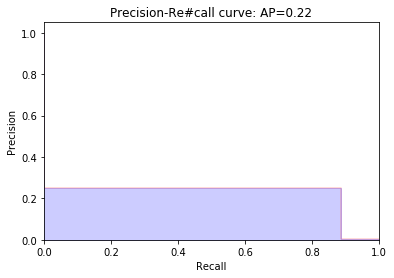

In [19]:
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
average = average_precision_score( y_val['Class'].values, y_pred_random12)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Re#call curve: AP={0:0.2f}'.format(average))
    

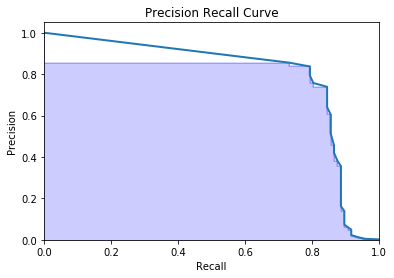

In [20]:
precision, recall, thresholds = precision_recall_curve(y_val, y_score_random12)
precision_random12, recall_random12, thresholds_random12 = precision, recall, thresholds
plot_precision_recall()

# AdaBoost All Features

In [21]:
adaBoostAllFeatures = joblib.load('../7. Modeling - DecisionTree AdaBoost/AdaBoost Classifier.pkl')

In [22]:
y_pred_val_Ada = adaBoostAllFeatures.predict(X_val)
y_score_AdaAll = adaBoostAllFeatures.predict_proba(X_val)[:,1]

Confusion matrix, without normalization
[[56493   372]
 [   13    84]]


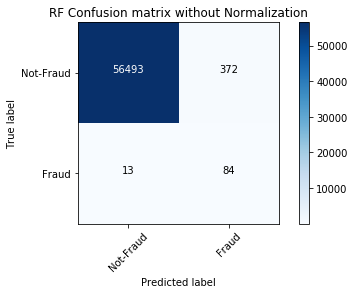

Normalized confusion matrix
[[0.99 0.01]
 [0.13 0.87]]


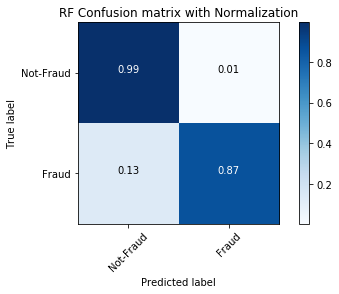

In [23]:
cm = confusion_matrix(y_val['Class'].values, y_pred_val_Ada)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'RF Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'RF Confusion matrix with Normalization')
plt.show()


# ROC on value score


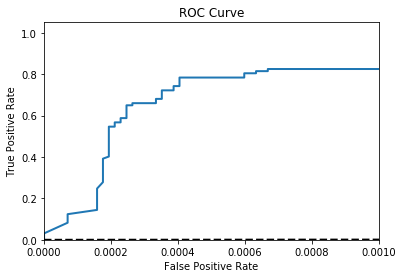

In [24]:
fpr, tpr, t =roc_curve(y_val, y_score_AdaAll)
plot_roc()

In [25]:
fpr_adaBoostAllFeatures, tpr_adaBoostAllFeatures, t_adaBoostAllFeatures = fpr, tpr, t

Text(0.5,1,'Precision-Recall curve: AP=0.16')

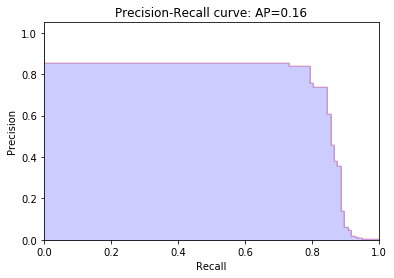

In [26]:
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
average = average_precision_score( y_val['Class'].values, y_pred_val_Ada)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average))
    

In [27]:
precision, recall, tresholds = precision_recall_curve( y_val['Class'].values, y_pred_val_Ada)


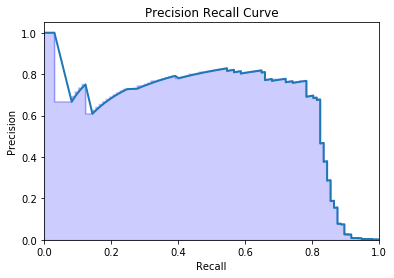

In [28]:
precision, recall, thresholds = precision_recall_curve(y_val, y_score_AdaAll)
precision_AdaAll, recall_AdaAll, thresholds_AdaAll = precision, recall, thresholds
plot_precision_recall()

# XGBoost OOB4

In [39]:
xgb = joblib.load('../9. XBoost/XGBoostBestParameters.pkl')

In [40]:
y_pred_val_Ada = xgb.predict(X_val)
y_score_AdaAll = xgb.predict_proba(X_val)[:,1]

Confusion matrix, without normalization
[[56297   568]
 [   11    86]]


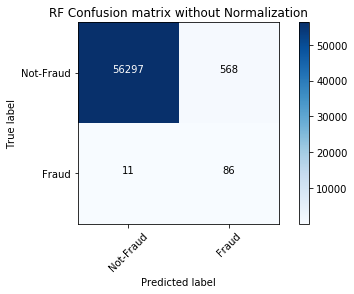

Normalized confusion matrix
[[0.99 0.01]
 [0.11 0.89]]


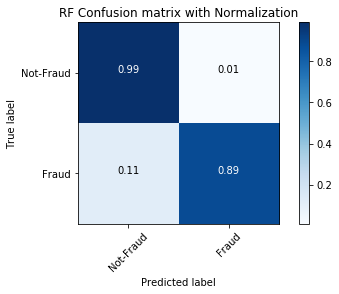

Precision: 0.13149847094801223
Recall: 0.8865979381443299


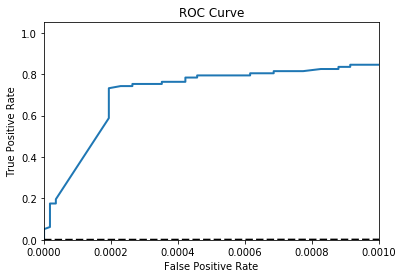

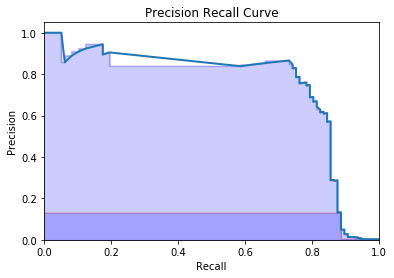

In [41]:


cm = confusion_matrix(y_val['Class'].values, y_pred_xgb)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'RF Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'RF Confusion matrix with Normalization')
plt.show()


prec = precision_score(y_val['Class'], y_pred_xgb)
rec = recall_score(y_val['Class'], y_pred_xgb)

print('Precision:', prec)
print('Recall:', rec)

fpr, tpr, t =roc_curve(y_val, y_score_xgb)
plot_roc()

fpr_xgb, tpr_xgb, t_xgb = fpr, tpr, t

precision, recall, tresholds = precision_recall_curve( y_val['Class'].values, y_pred_xgb)


# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
average = average_precision_score( y_val['Class'].values, y_pred_xgb)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Re#call curve: AP={0:0.2f}'.format(average))

precision, recall, thresholds = precision_recall_curve(y_val, y_score_xgb)
precision_xgb, recall_xgb, thresholds_xgb = precision, recall, thresholds
plot_precision_recall()

#  Ensemble Classifier between 

In [42]:
ensemble = joblib.load('../11. Ensemble Classifier/Ensemble Classifier All Model.pkl')

In [43]:
ensemble.fit(X_train_resampled, y_train_resampled)
y_pred = ensemble.predict(X_val)

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [44]:
y_score = ensemble.predict_proba(X_val)[:,1]

Confusion matrix, without normalization
[[56696   169]
 [   13    84]]


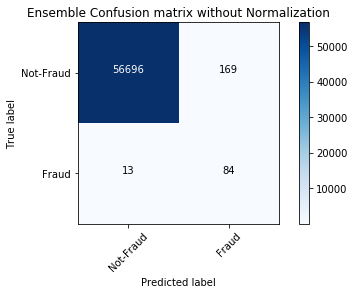

Normalized confusion matrix
[[1.   0.  ]
 [0.13 0.87]]


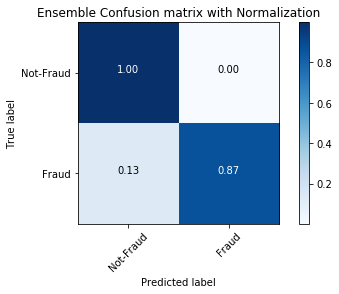

In [45]:
cm = confusion_matrix(y_val['Class'].values, y_pred)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'Ensemble Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'Ensemble Confusion matrix with Normalization')
plt.show()


In [46]:
prec = precision_score(y_val['Class'], y_pred)
rec = recall_score(y_val['Class'], y_pred)
f1 = f1_score( y_val['Class'].values, y_pred, average='binary')


print('Precision:', prec)
print('Recall:', rec)
print ('F1', f1)


Precision: 0.33201581027667987
Recall: 0.865979381443299
F1 0.48


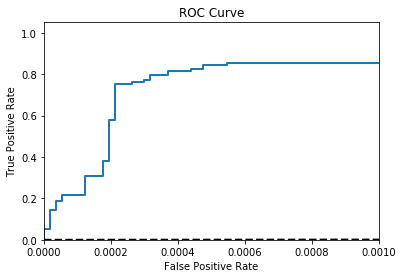

In [47]:
fpr, tpr, t =roc_curve(y_val, y_score)
plot_roc()

In [48]:
fpr_ensemble, tpr_ensemble, t_ensemble = fpr, tpr, t

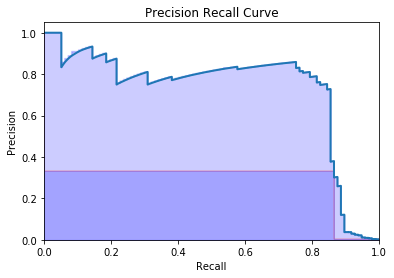

In [49]:
precision, recall, tresholds = precision_recall_curve( y_val['Class'].values, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
average = average_precision_score( y_val['Class'].values, y_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average))

precision, recall, thresholds = precision_recall_curve(y_val, y_score)
precision_ensemble, recall_ensemble, thresholds_ensemble = precision, recall, thresholds
plot_precision_recall()

In [50]:
def roc_curve_all_models () : 
    plt.figure(figsize=(16, 12))
    plt.plot(fpr_randomOOB12, tpr_randomOOB12, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_adaBoostAllFeatures, tpr_adaBoostAllFeatures, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_xgb, tpr_xgb, label = 'ROC curve', linewidth = 2)
    #plt.plot(fpr_ensemble, tpr_ensemble, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(['Random Forest', 'Ada Boost ', 'XGB'], loc='upper left')
    plt.savefig('VotingClassifier.png')
    plt.show();

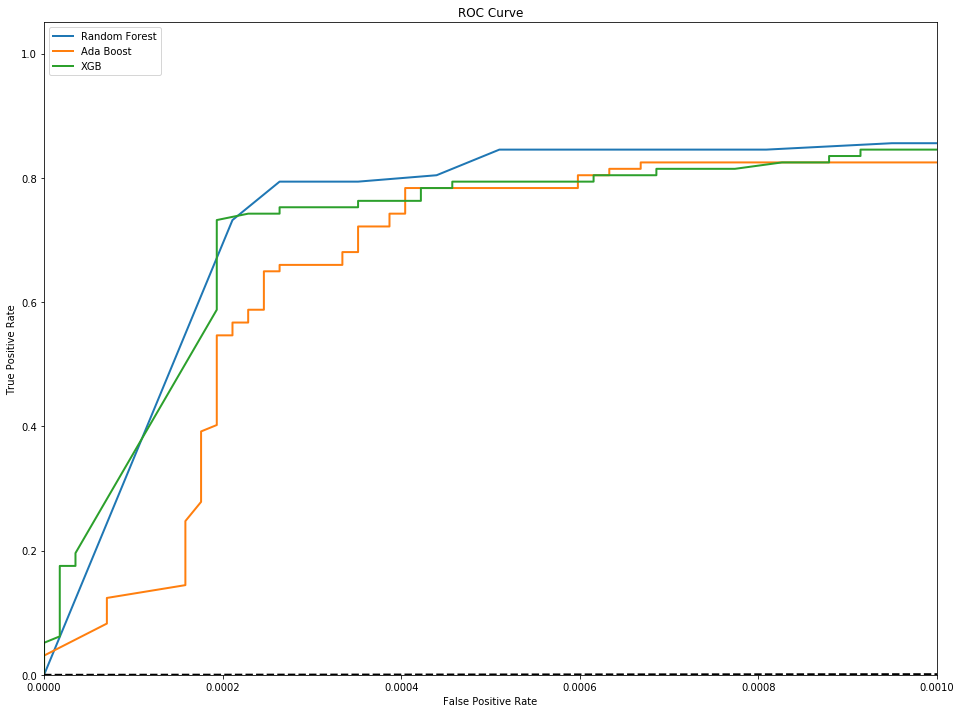

In [51]:
roc_curve_all_models()

In [52]:
def prec_recall_all_models () :
    plt.figure(figsize=(16, 12))
    
    plt.plot(recall_AdaAll, precision_AdaAll, linewidth = 2)
   
    
    plt.plot(recall_xgb, precision_xgb, linewidth = 2)
    
    
    plt.plot(recall_random12, precision_random12, linewidth = 2)
    
    
    #plt.plot(recall_VC, precision_VC, linewidth = 2)
    plt.plot(recall_ensemble, precision_ensemble, linewidth = 2)
   
    
    plt.scatter(rec, prec, linewidth = 2, color = 'red')
    plt.axvline(rec, color = 'red', linewidth = 1, linestyle='--')
    plt.axhline(prec, color = 'red', linewidth = 1, linestyle='--')
    #plt.xlim([0.0,1])
    #plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve - PR = 0.3268 - REC = 0.8659 - F1 = 0.4745 ')
    plt.legend(['AB', 'XGB', 'RF12', 'Ensemble'], loc='upper right')
    plt.savefig('Precision-Recall (4 best model).png')
    plt.show();

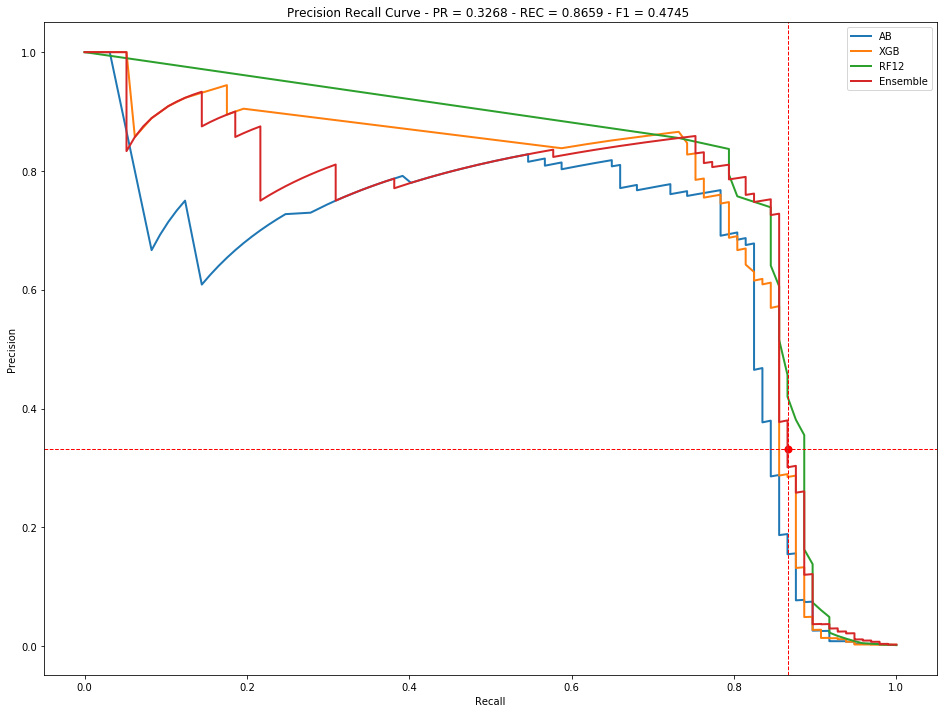

In [53]:
prec_recall_all_models()